# Time Series Forecasting using LSTM

In [2]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [6]:
y

array([146, 158, 172, 187, 196, 210])

In [7]:
X.shape

(6, 3)

In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# Convert your data into 3D
X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
X.shape

(6, 3, 1)

In [10]:
# define model
model = Sequential()
# relu works well with LSTM
# in input shape give last as 1 which makes data as 3d
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Train on 6 samples
Epoch 1/300
6/6 [==============================] - 6s 988ms/sample - loss: 31105.2598
Epoch 2/300
6/6 [==============================] - 0s 4ms/sample - loss: 30589.6465
Epoch 3/300
6/6 [==============================] - 0s 3ms/sample - loss: 30086.1797
Epoch 4/300
6/6 [==============================] - 0s 4ms/sample - loss: 29574.2285
Epoch 5/300
6/6 [==============================] - 0s 3ms/sample - loss: 29026.6973
Epoch 6/300
6/6 [==============================] - 0s 3ms/sample - loss: 28408.5781
Epoch 7/300
6/6 [==============================] - 0s 3ms/sample - loss: 27686.4375
Epoch 8/300
6/6 [==============================] - 0s 3ms/sample - loss: 26879.7129
Epoch 9/300
6/6 [==============================] - 0s 4ms/sample - loss: 26134.3535
Epoch 10/300
6/6 [==============================] - 0s 4ms/sample - loss: 25463.2344
Epoch 11/300
6/6 [==============================] - 0s 4ms/sample - loss: 24779.9141
Epoch 12/300
6/6 [==============================] - 0

Epoch 100/300
6/6 [==============================] - 0s 4ms/sample - loss: 20.9657
Epoch 101/300
6/6 [==============================] - 0s 3ms/sample - loss: 20.6968
Epoch 102/300
6/6 [==============================] - 0s 4ms/sample - loss: 20.3888
Epoch 103/300
6/6 [==============================] - 0s 3ms/sample - loss: 20.0749
Epoch 104/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.7866
Epoch 105/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.5502
Epoch 106/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.3765
Epoch 107/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.2658
Epoch 108/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.2117
Epoch 109/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.1972
Epoch 110/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.2037
Epoch 111/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.2116
Epoc

Epoch 200/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.3728
Epoch 201/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.3666
Epoch 202/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.3122
Epoch 203/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.2939
Epoch 204/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.2873
Epoch 205/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.2526
Epoch 206/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.2192
Epoch 207/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.2168
Epoch 208/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.1868
Epoch 209/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.1592
Epoch 210/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.1527
Epoch 211/300
6/6 [==============================] - 0s 4ms/sample - loss: 3.1299
Epoch 212/300
6/

Epoch 300/300
6/6 [==============================] - 0s 3ms/sample - loss: 0.5303


In [17]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210],dtype='float32')
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:],dtype='float32')
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.30681]
1 day input [196.      210.      222.30681]
1 day output [[233.3948]]
2 day input [210.      222.30681 233.3948 ]
2 day output [[246.77533]]
3 day input [222.30681 233.3948  246.77533]
3 day output [[259.32263]]
4 day input [233.3948  246.77533 259.32263]
4 day output [[271.9991]]
5 day input [246.77533 259.32263 271.9991 ]
5 day output [[285.89438]]
6 day input [259.32263 271.9991  285.89438]
6 day output [[299.61124]]
7 day input [271.9991  285.89438 299.61124]
7 day output [[313.88663]]
8 day input [285.89438 299.61124 313.88663]
8 day output [[328.99243]]
9 day input [299.61124 313.88663 328.99243]
9 day output [[344.3505]]
[222.30681, 233.3948, 246.77533, 259.32263, 271.9991, 285.89438, 299.61124, 313.88663, 328.99243, 344.3505]


In [19]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [20]:
import matplotlib.pyplot as plt

In [21]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

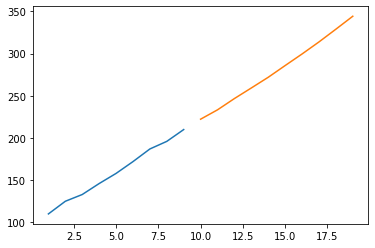

In [22]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)